### Info 
MMO lab-3
IU5-21M, Denis Vasilev

### 0. Импорт библиотек и загрузка датасета

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
%matplotlib inline 
sns.set(style="ticks")

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Rank,City,State,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
0,1,Sitka,Alaska,"2,870.10","7,434","1,945.10","5,038","4,815.10","12,471","8,458"
1,2,Juneau,Alaska,"2,704.00","7,003",550.7,"1,426","3,254.70","8,430","32,255"
2,3,Wrangell,Alaska,"2,556.00","6,620",920.6,"2,384","3,476.60","9,004","2,127"
3,4,Anchorage,Alaska,"1,706.80","4,421",239.9,621,"1,946.70","5,042","2,91,247"
4,5,Tribune,Kansas,778.2,"2,016",0,0,778.2,"2,016","1,182"


In [3]:
def repair_df(df : pd.DataFrame):
    df['Population (2020)'] = df['Population (2020)'].apply(lambda x: int(''.join(x.split(','))))
    df[' (km2).2'] = df[' (km2).2'].apply(lambda x: float(''.join(x.split(','))))
    df[' (km2).1'] = df[' (km2).1'].apply(lambda x: float(''.join(x.split(','))))
    df[' (km2)'] = df[' (km2)'].apply(lambda x: int(''.join(x.split(','))))
    df['Water area (sq mi)'] = df['Water area (sq mi)'].apply(lambda x: float(''.join(x.split(','))))
    df['Land area (sq mi)'] = df['Land area (sq mi)'].apply(lambda x: float(''.join(x.split(','))))
    df['Total area (sq mi)'] = df['Total area (sq mi)'].apply(lambda x: float(''.join(x.split(','))))
    return df


In [4]:
df = repair_df(df)

In [5]:
df.describe()

,Rank,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02
mean,75.500000,247.013333,639.780000,38.148667,98.777467,285.158000,738.560000,4.127783e+05
std,43.445368,400.666580,1037.745432,184.266807,477.247756,560.643139,1452.066648,8.550999e+05
min,1.000000,78.500000,203.000000,0.000000,0.000000,78.500000,203.000000,3.060000e+02
25%,38.250000,101.525000,262.750000,0.700000,1.800000,104.325000,270.000000,9.220750e+04
50%,75.500000,134.500000,348.500000,2.650000,6.900000,142.000000,368.000000,2.006680e+05
75%,112.750000,217.700000,564.000000,8.150000,20.750000,239.600000,620.500000,4.656162e+05
max,150.000000,2870.100000,7434.000000,1945.100000,5038.000000,4815.100000,12471.000000,8.804190e+06


In [6]:
df.dtypes

Rank                    int64
City                   object
State                  object
Land area (sq mi)     float64
 (km2)                  int64
Water area (sq mi)    float64
 (km2).1              float64
Total area (sq mi)    float64
 (km2).2              float64
Population (2020)       int64
dtype: object

In [7]:
def obj_col(column): 
    return column[1] == 'object'

col_names = []
for col in list(filter(obj_col, list(zip(list(df.columns), list(df.dtypes))))):
  col_names.append(col[0])

In [8]:
X_ALL = df.drop(col_names, axis=1)
X_ALL

,Rank,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
0,1,2870.1,7434,1945.1,5038.0,4815.1,12471.0,8458
1,2,2704.0,7003,550.7,1426.0,3254.7,8430.0,32255
2,3,2556.0,6620,920.6,2384.0,3476.6,9004.0,2127
3,4,1706.8,4421,239.9,621.0,1946.7,5042.0,291247
4,5,778.2,2016,0.0,0.0,778.2,2016.0,1182
...,...,...,...,...,...,...,...,...
145,146,79.6,206,21.4,55.0,101.0,262.0,269840
146,147,79.3,205,0.8,2.1,80.1,207.0,7396
147,148,79.3,205,14.6,38.0,93.9,243.0,8399
148,149,79.1,205,0.5,1.3,79.6,206.0,192517


In [9]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [10]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, df['Population (2020)'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((120, 8), (30, 8))

***
### Масштабирование "StandardScaler"

In [11]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
df_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
df_cs11_scaled =  arr_to_df(df_cs11_scaled_temp)
df_cs11_scaled

,Rank,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
0,-1.720542,6.568739,6.569030,10.383529,10.384060,8.106971,8.106890,-0.474418
1,-1.697448,6.152791,6.152316,2.790890,2.790309,5.314415,5.314637,-0.446495
2,-1.674353,5.782169,5.782010,4.805030,4.804377,5.711536,5.711260,-0.481847
3,-1.651258,3.655601,3.655894,1.098555,1.097904,2.973564,2.973594,-0.142601
4,-1.628164,1.330199,1.330606,-0.207723,-0.207667,0.882368,0.882686,-0.482956
...,...,...,...,...,...,...,...,...
145,1.628164,-0.419237,-0.419403,-0.091198,-0.092036,-0.329577,-0.329294,-0.167720
146,1.651258,-0.419988,-0.420370,-0.203367,-0.203252,-0.366980,-0.367298,-0.475664
147,1.674353,-0.419988,-0.420370,-0.128225,-0.127777,-0.342283,-0.342422,-0.474487
148,1.697448,-0.420489,-0.420370,-0.205001,-0.204933,-0.367875,-0.367989,-0.258448


In [12]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

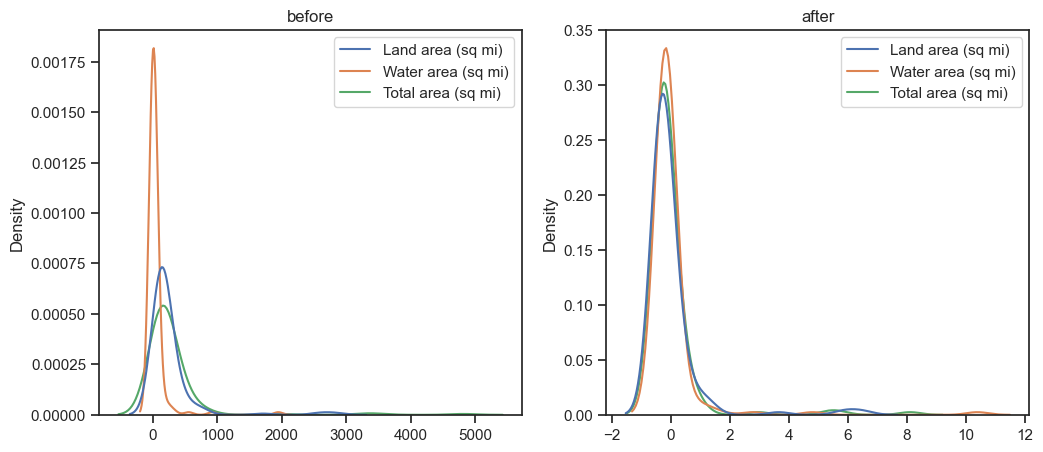

In [13]:
draw_kde(['Land area (sq mi)', 'Water area (sq mi)', 'Total area (sq mi)'], df, df_cs11_scaled, 'before', 'after')

### Масштабирование "Mean Normalisation"

In [14]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, df['Population (2020)'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((120, 8), (30, 8))

In [15]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [16]:
sc21 = MeanNormalisation()
df_cs21_scaled = sc21.fit_transform(X_ALL)
df_cs21_scaled.describe()

,Rank,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,-0.007215,-0.004949,-0.004947,-0.002780,-0.002780,-0.004059,-0.004060,-0.000337
std,0.291580,0.143526,0.143513,0.094734,0.094730,0.118364,0.118362,0.097128
min,-0.507215,-0.065314,-0.065351,-0.022393,-0.022387,-0.047689,-0.047715,-0.047189
25%,-0.257215,-0.057066,-0.057088,-0.022033,-0.022029,-0.042237,-0.042254,-0.036750
50%,-0.007215,-0.045253,-0.045229,-0.021030,-0.021017,-0.034283,-0.034265,-0.024430
75%,0.242785,-0.015450,-0.015427,-0.018203,-0.018268,-0.013677,-0.013683,0.005664
max,0.492785,0.934686,0.934649,0.977607,0.977613,0.952311,0.952285,0.952811


In [17]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
df_cs22_scaled_train = cs22.transform(X_train)
df_cs22_scaled_test = cs22.transform(X_test)

In [18]:
df_cs22_scaled_test.describe()

,Rank,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.036074,-0.024745,-0.024734,-0.013899,-0.013900,-0.020294,-0.020299,-0.001687
std,0.267647,0.049572,0.049559,0.026031,0.026034,0.035161,0.035165,0.066386
min,-0.473658,-0.065027,-0.065074,-0.022341,-0.022335,-0.047351,-0.047389,-0.046957
25%,-0.263926,-0.053797,-0.053768,-0.022226,-0.022221,-0.040595,-0.040603,-0.036715
50%,-0.010570,-0.045128,-0.045160,-0.021544,-0.021543,-0.034219,-0.034184,-0.025034
75%,0.143792,-0.013479,-0.013456,-0.019655,-0.019707,-0.016015,-0.016047,0.006627
max,0.472651,0.174262,0.174174,0.107575,0.107625,0.120364,0.120365,0.264729


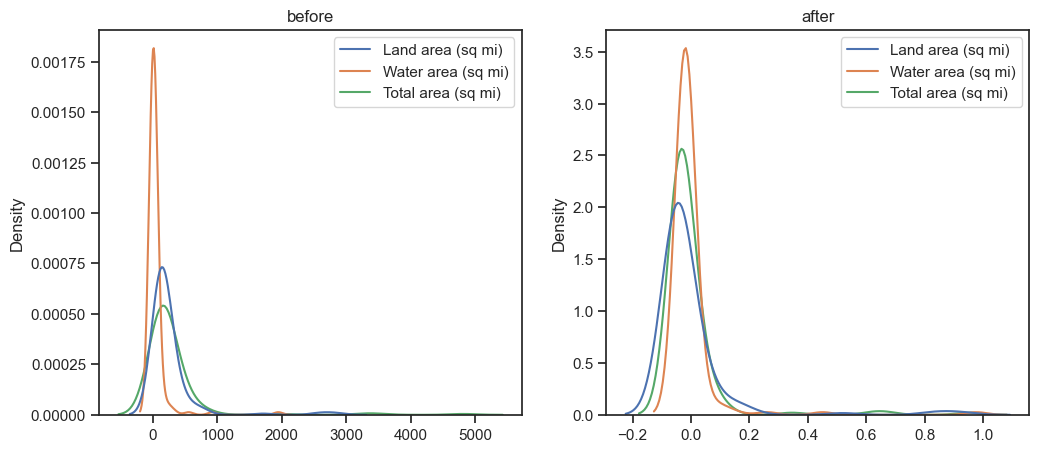

In [19]:
draw_kde(['Land area (sq mi)', 'Water area (sq mi)', 'Total area (sq mi)'], df, df_cs21_scaled, 'before', 'after')

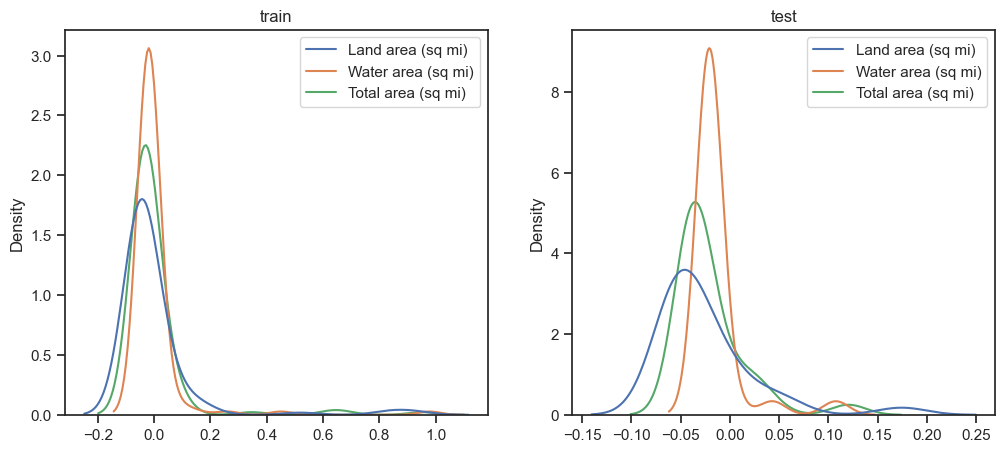

In [20]:
draw_kde(['Land area (sq mi)', 'Water area (sq mi)', 'Total area (sq mi)'], df_cs22_scaled_train, df_cs22_scaled_test, 'train', 'test')

### Масштабирование "MinMax"

In [21]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
df_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
df_cs31_scaled.describe()

,Rank,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
count,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.50000,0.060364,0.060404,0.019613,0.019606,0.043630,0.043655,0.046851
std,0.29158,0.143526,0.143513,0.094734,0.094730,0.118364,0.118362,0.097128
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.008248,0.008263,0.000360,0.000357,0.005452,0.005461,0.010439
50%,0.50000,0.020060,0.020122,0.001362,0.001370,0.013406,0.013450,0.022758
75%,0.75000,0.049864,0.049924,0.004190,0.004119,0.034012,0.034032,0.052853
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
df_cs32_scaled_train_temp = cs32.transform(X_train)
df_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
df_cs32_scaled_train = arr_to_df(df_cs32_scaled_train_temp)
df_cs32_scaled_test = arr_to_df(df_cs32_scaled_train_temp)

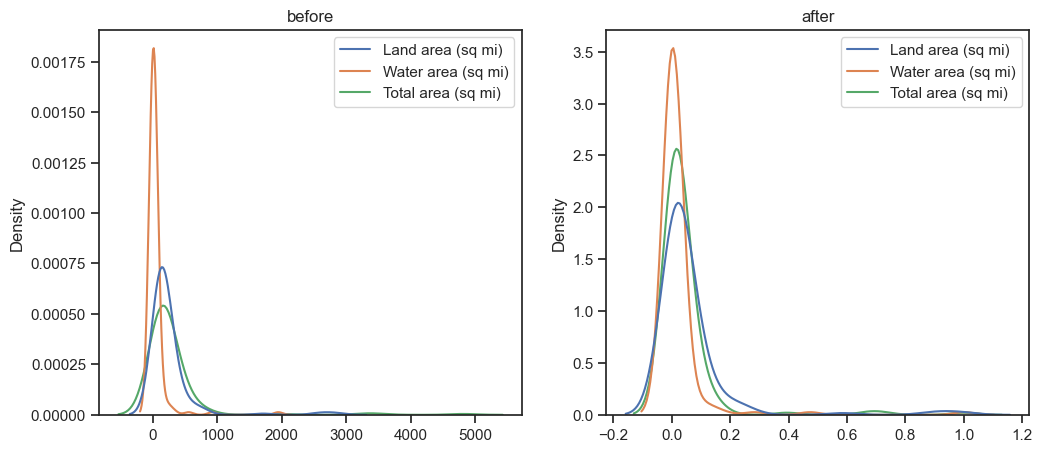

In [23]:
draw_kde(['Land area (sq mi)', 'Water area (sq mi)', 'Total area (sq mi)'], df, df_cs31_scaled, 'before', 'after')

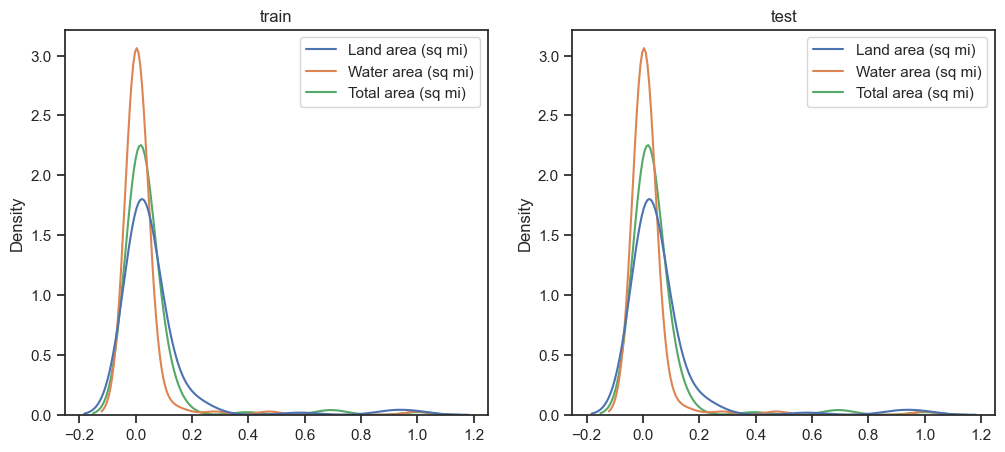

In [24]:
draw_kde(['Land area (sq mi)', 'Water area (sq mi)', 'Total area (sq mi)'], df_cs32_scaled_train, df_cs32_scaled_test, 'train', 'test')

### Обработка выбросов для числовых признаков

In [25]:
df = repair_df(pd.read_csv('dataset.csv'))
df

,Rank,City,State,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
0,1,Sitka,Alaska,2870.1,7434,1945.1,5038.0,4815.1,12471.0,8458
1,2,Juneau,Alaska,2704.0,7003,550.7,1426.0,3254.7,8430.0,32255
2,3,Wrangell,Alaska,2556.0,6620,920.6,2384.0,3476.6,9004.0,2127
3,4,Anchorage,Alaska,1706.8,4421,239.9,621.0,1946.7,5042.0,291247
4,5,Tribune,Kansas,778.2,2016,0.0,0.0,778.2,2016.0,1182
...,...,...,...,...,...,...,...,...,...,...
145,146,Madison,Wisconsin,79.6,206,21.4,55.0,101.0,262.0,269840
146,147,Caribou,Maine,79.3,205,0.8,2.1,80.1,207.0,7396
147,148,Ellsworth,Maine,79.3,205,14.6,38.0,93.9,243.0,8399
148,149,Sioux Falls,South Dakota,79.1,205,0.5,1.3,79.6,206.0,192517


In [26]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # violinplot
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # boxplot
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

C:\Users\denis.vasilev\AppData\Local\Temp\ipykernel_12472\4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


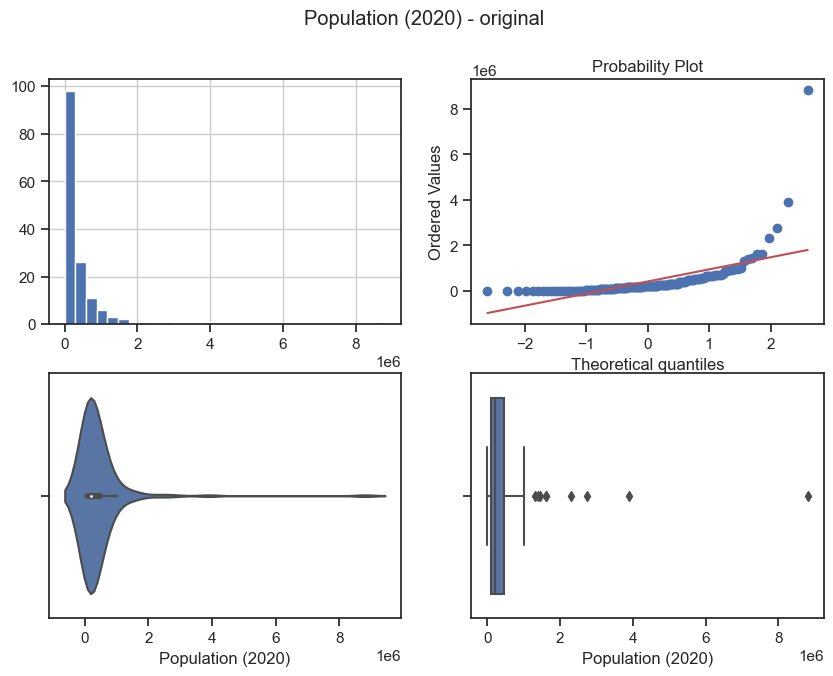

C:\Users\denis.vasilev\AppData\Local\Temp\ipykernel_12472\4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


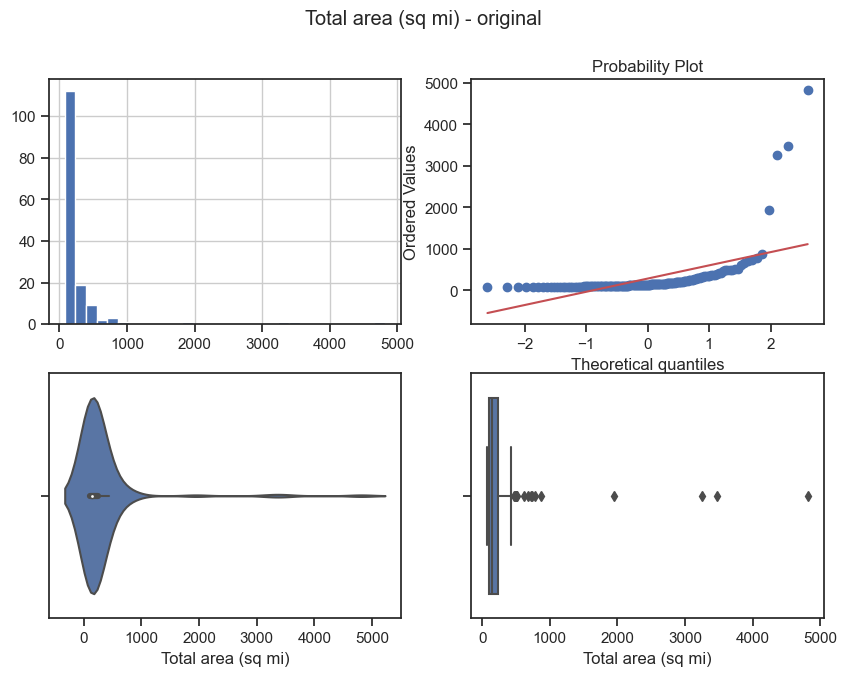

C:\Users\denis.vasilev\AppData\Local\Temp\ipykernel_12472\4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


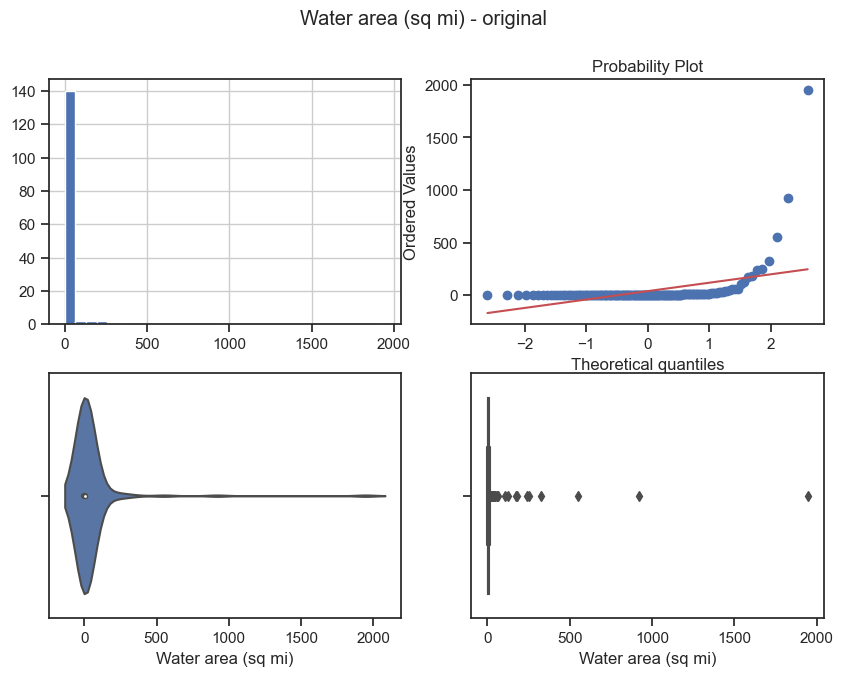

C:\Users\denis.vasilev\AppData\Local\Temp\ipykernel_12472\4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


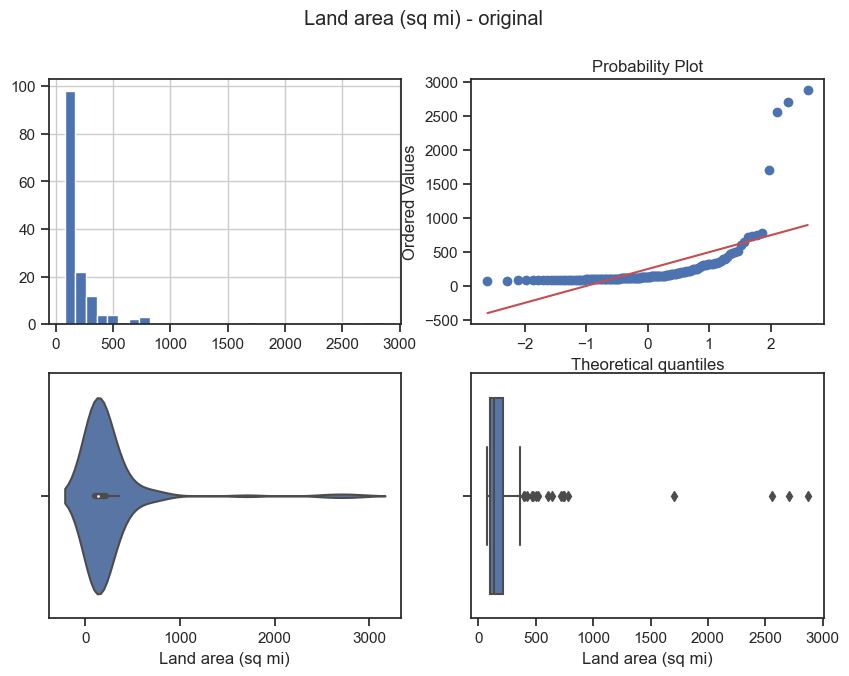

In [27]:
diagnostic_plots(df, 'Population (2020)', 'Population (2020) - original')
diagnostic_plots(df, 'Total area (sq mi)', 'Total area (sq mi) - original')
diagnostic_plots(df, 'Water area (sq mi)', 'Water area (sq mi) - original')
diagnostic_plots(df, 'Land area (sq mi)', 'Land area (sq mi) - original')
# diagnostic_plots(df, '', ' - original')

In [28]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary

### Удаление выбросов (number_of_reviews)

C:\Users\denis.vasilev\AppData\Local\Temp\ipykernel_12472\4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


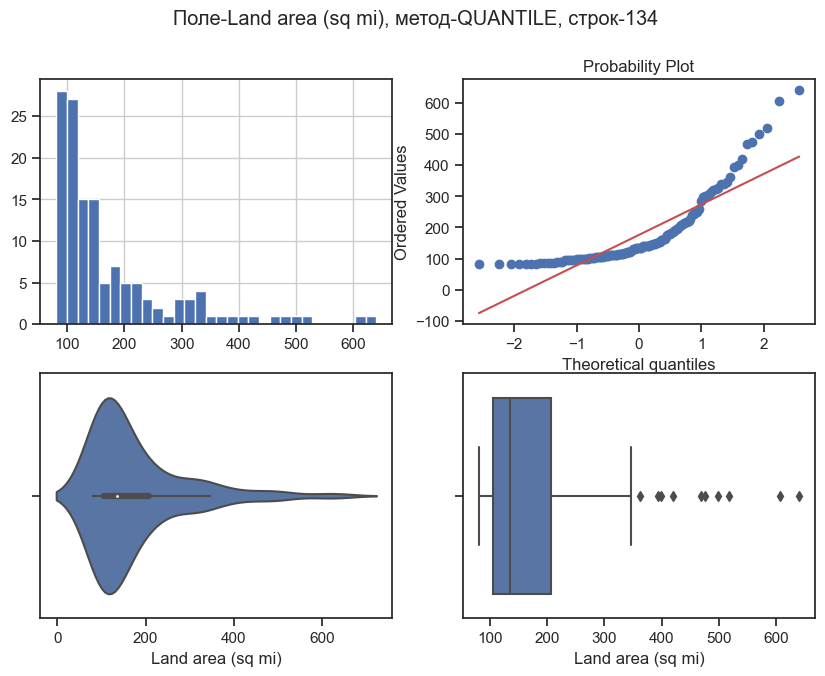

In [29]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(df, "Land area (sq mi)")
# Флаги для удаления выбросов
outliers_temp = np.where(df["Land area (sq mi)"] > upper_boundary, True, 
                         np.where(df["Land area (sq mi)"] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = df.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format("Land area (sq mi)", "QUANTILE", data_trimmed.shape[0])
diagnostic_plots(data_trimmed, "Land area (sq mi)", title)

### Замена выбросов

C:\Users\denis.vasilev\AppData\Local\Temp\ipykernel_12472\4201870494.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


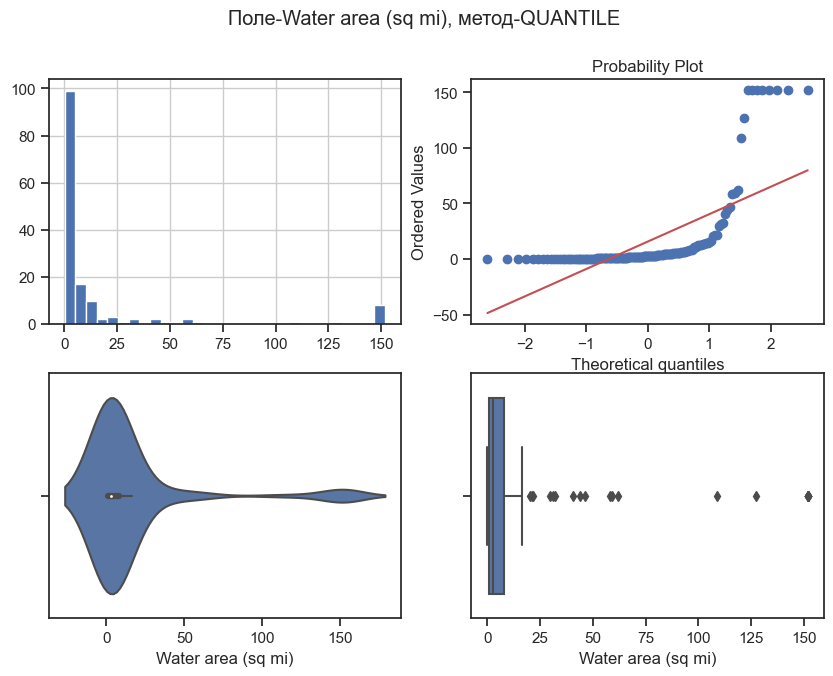

In [30]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(df, "Water area (sq mi)")
# Изменение данных
df["Water area (sq mi)"] = np.where(df["Water area (sq mi)"] > upper_boundary, upper_boundary,
                     np.where(df["Water area (sq mi)"] < lower_boundary, lower_boundary, df["Water area (sq mi)"]))
title = 'Поле-{}, метод-{}'.format("Water area (sq mi)", "QUANTILE")
diagnostic_plots(df, "Water area (sq mi)", title)

***
### Отбор признаков
### Метод фильтрации (Корреляция признаков)

In [31]:
df_new = df.drop(columns=['City ', 'State '])

<Axes: >

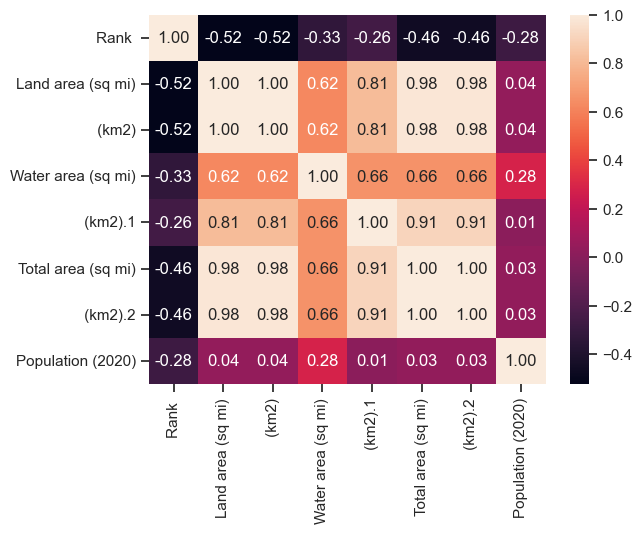

In [32]:
sns.heatmap(df_new.corr(), annot=True, fmt='.2f')

In [33]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = df_new.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.3]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [34]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(df_new))

[[' (km2).2',
  ' (km2)',
  'Land area (sq mi)',
  ' (km2).1',
  'Water area (sq mi)',
  'Rank ',
  'Total area (sq mi)']]

### Метод из группы методов вложений

In [35]:
df = repair_df(pd.read_csv('dataset.csv'))
df.drop(columns=['City ', 'State '], inplace=True)
df

,Rank,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
0,1,2870.1,7434,1945.1,5038.0,4815.1,12471.0,8458
1,2,2704.0,7003,550.7,1426.0,3254.7,8430.0,32255
2,3,2556.0,6620,920.6,2384.0,3476.6,9004.0,2127
3,4,1706.8,4421,239.9,621.0,1946.7,5042.0,291247
4,5,778.2,2016,0.0,0.0,778.2,2016.0,1182
...,...,...,...,...,...,...,...,...
145,146,79.6,206,21.4,55.0,101.0,262.0,269840
146,147,79.3,205,0.8,2.1,80.1,207.0,7396
147,148,79.3,205,14.6,38.0,93.9,243.0,8399
148,149,79.1,205,0.5,1.3,79.6,206.0,192517


In [36]:
df.columns

Index(['Rank ', 'Land area (sq mi)', ' (km2)', 'Water area (sq mi)',
       ' (km2).1', 'Total area (sq mi)', ' (km2).2', 'Population (2020)'],
      dtype='object')

In [37]:
X3_ALL = df.drop([' (km2)'], axis=1)

In [38]:
# Разделим выборку на обучающую и тестовую
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_ALL, df[' (km2)'],
                                                    test_size=0.2,
                                                    random_state=1)

In [39]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X3_train, y3_train)
# Коэффициенты регрессии
e_lr1.coef_

c:\Users\denis.vasilev\Desktop\sem2_mmo\mmo_env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[ 2.43959825e-01, -1.76857746e-01,  0.00000000e+00,
        -2.47978764e+01, -1.62423991e-01, -6.93264753e-02,
         6.49206629e-05],
       [ 2.54069209e-01, -1.79446840e-01, -1.27193654e-01,
         1.90240328e-01, -1.34573722e-01, -6.36154704e-02,
        -4.79787513e-06],
       [ 1.03241273e-01, -9.37380744e-02,  1.07899969e-01,
         2.79630921e-02, -6.59239060e-02, -2.20610335e-02,
        -3.25168996e-06],
       [ 8.45730658e-02, -6.42521574e-02,  4.17525870e-03,
        -1.97538221e-03, -4.95620524e-02, -2.00682776e-02,
         4.76681723e-06],
       [ 7.78470858e-01, -5.82456461e-01,  0.00000000e+00,
        -8.71744843e+00, -5.73484920e-01, -2.24471307e-01,
         1.38543948e-04],
       [ 2.03996500e-02, -2.04286593e-02,  0.00000000e+00,
        -1.12939288e+01, -2.55088640e-02, -8.15683455e-03,
        -1.66514887e-05],
       [ 2.67613828e-02, -3.69925150e-02, -4.00018003e+00,
         1.33120947e+00, -3.80788182e-02, -1.31230224e-02,
         2.5935629

In [40]:
# Все признаки являются "хорошими"
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X3_train, y3_train)
sel_e_lr1.get_support()

c:\Users\denis.vasilev\Desktop\sem2_mmo\mmo_env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([ True,  True,  True,  True,  True,  True,  True])

In [41]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X3_train, y3_train)
# Коэффициенты регрессии
e_lr2.coef_

c:\Users\denis.vasilev\Desktop\sem2_mmo\mmo_env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.61398954e-03,
        -6.73445181e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.50281017e-03,  0.00000000e+00, -3.26928402e-03,
        -7.57148549e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.67110984e-03,  0.00000000e+00, -3.62950139e-03,
        -2.13153153e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.76316462e-03,
         1.36629251e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.39785247e-03,
         4.99128798e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.55585771e-03,
        -7.66756302e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.01768604e-03,
         8.7876908

In [42]:
# Признаки с флагом False д.б. исключены
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X3_train, y3_train)
sel_e_lr2.get_support()

c:\Users\denis.vasilev\Desktop\sem2_mmo\mmo_env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([ True,  True, False,  True, False,  True,  True])